In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#Download the NBA API

!pip install nba_api

In [39]:
from nba_api.stats.static import teams

In [40]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [41]:
#The method get_teams() returns a list of dictionaries.
nba_teams = teams.get_teams()

In [42]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [43]:
# one_dict() converts dictionary to table

my_nba = one_dict(nba_teams)
df_teams = pd.DataFrame(my_nba)
df_teams

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [44]:
df_warriors = df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [47]:
id_warriors = df_warriors[['id']].values[0][0]
id_warriors

np.int64(1610612744)

In [48]:
from nba_api.stats.endpoints import leaguegamefinder

In [49]:
# request transmitted via HTTP 
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [50]:
# gamefinder.getjson()    (to get the JSON file (too long too load))

In [53]:
# get_data_frames()   to get dataframes

games = gamefinder.get_data_frames()[0]
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,12025,1610612744,GSW,Golden State Warriors,0012500030,2025-10-05,GSW vs. LAL,W,241,111,...,0.762,8.0,36.0,44.0,35,11,7,18,24,8.0
1,22025,1610612744,GSW,Golden State Warriors,1522500071,2025-07-19,GSW vs. CLE,W,201,82,...,0.625,14.0,27.0,41.0,17,14,6,20,23,11.0
2,22025,1610612744,GSW,Golden State Warriors,1522500059,2025-07-17,GSW @ TOR,L,201,69,...,0.655,17.0,31.0,48.0,14,8,4,27,29,-12.0
3,22025,1610612744,GSW,Golden State Warriors,1522500045,2025-07-15,GSW @ MEM,W,200,96,...,0.652,12.0,24.0,36.0,21,8,6,18,19,12.0
4,22025,1610612744,GSW,Golden State Warriors,1522500031,2025-07-13,GSW @ UTA,W,200,103,...,0.844,14.0,33.0,47.0,18,9,5,17,20,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,21983,1610612744,GOS,Golden State Warriors,0028300048,1983-11-05,GOS vs. NYK,W,240,102,...,0.711,25.0,18.0,43.0,20,16,4,17,27,NaN
3818,21983,1610612744,GOS,Golden State Warriors,0028300040,1983-11-03,GOS @ UTH,L,240,112,...,0.880,27.0,26.0,53.0,22,11,4,19,31,NaN
3819,21983,1610612744,GOS,Golden State Warriors,0028300029,1983-11-01,GOS @ KCK,L,240,114,...,0.750,12.0,18.0,30.0,29,15,3,16,28,NaN
3820,21983,1610612744,GOS,Golden State Warriors,0028300013,1983-10-29,GOS vs. POR,W,240,97,...,0.725,12.0,31.0,43.0,21,9,1,16,37,NaN


In [55]:
games_home = games[games['MATCHUP']== 'GSW vs. TOR']
games_away = games[games['MATCHUP']== 'GSW @ TOR']

In [56]:
# For games @home & away, find the mean of the PLUS_MINUS
#The PLUS_MINUS column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. 

games_home['PLUS_MINUS'].mean()
games_away['PLUS_MINUS'].mean()

np.float64(-2.051428571428571)

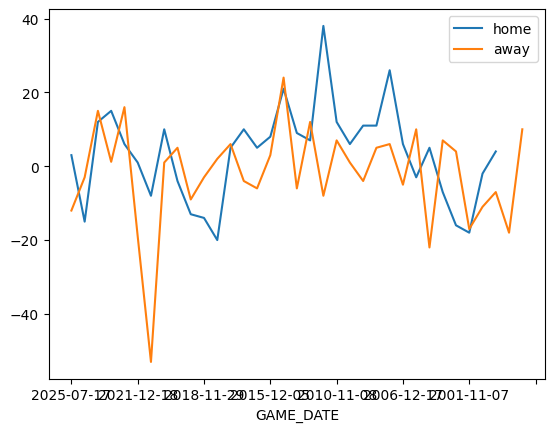

In [59]:
# Darft the plot

fig , ax = plt.subplots()
games_home.plot(x='GAME_DATE' , y='PLUS_MINUS', ax=ax)
games_away.plot(x='GAME_DATE' , y='PLUS_MINUS', ax=ax)
ax.legend(['home','away'])
plt.show()